In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sonar.csv')

In [3]:
df.head()

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [4]:
df.shape

(207, 61)

In [5]:
df.isnull().sum()

0.02      0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
         ..
0.018     0
0.0084    0
0.009     0
0.0032    0
R         0
Length: 61, dtype: int64

In [6]:
df['R'].unique()

array(['R', 'M'], dtype=object)

In [7]:
len(df.columns)

61

In [8]:
X = df.iloc[:, :-1].values

In [9]:
X.shape

(207, 60)

In [10]:
y = df.iloc[:, -1].values
y.shape

(207,)

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.61738484, 0.19202743, 0.11795717, ..., 0.22119816, 0.12286689,
        0.13777778],
       [0.12035661, 0.14573511, 0.04744646, ..., 0.25115207, 0.6552901 ,
        0.67111111],
       [0.12630015, 0.05829404, 0.05172982, ..., 0.08294931, 0.22525597,
        0.02666667],
       ...,
       [0.32243685, 0.18474068, 0.10642504, ..., 0.18202765, 0.39590444,
        0.22222222],
       [0.21173848, 0.09215602, 0.13476112, ..., 0.11520737, 0.22525597,
        0.21333333],
       [0.10178306, 0.10587227, 0.07841845, ..., 0.21658986, 0.16040956,
        0.05777778]])

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, mode='min')

In [18]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 165 samples, validate on 42 samples
Epoch 1/100
165/165 [==============================] - 1s 5ms/sample - loss: 0.7415 - accuracy: 0.4788 - val_loss: 0.7125 - val_accuracy: 0.3571
Epoch 2/100
165/165 [==============================] - 0s 252us/sample - loss: 0.7142 - accuracy: 0.4909 - val_loss: 0.6907 - val_accuracy: 0.5476
Epoch 3/100
165/165 [==============================] - 0s 223us/sample - loss: 0.7121 - accuracy: 0.4606 - val_loss: 0.6813 - val_accuracy: 0.6429
Epoch 4/100
165/165 [==============================] - 0s 270us/sample - loss: 0.6909 - accuracy: 0.5152 - val_loss: 0.6703 - val_accuracy: 0.6190
Epoch 5/100
165/165 [==============================] - 0s 267us/sample - loss: 0.6973 - accuracy: 0.5091 - val_loss: 0.6671 - val_accuracy: 0.6190
Epoch 6/100
165/165 [==============================] - 0s 246us/sample - loss: 0.6644 - accuracy: 0.5818 - val_loss: 0.6626 - val_accuracy: 0.6190
Epoch 7/100
165/165 [==============================] - 0s 284us/sample - lo

In [19]:
metrics = pd.DataFrame(model.history.history)

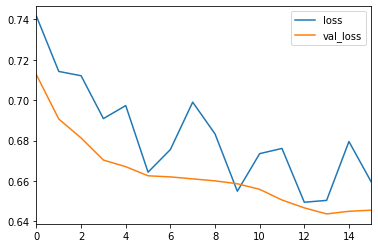

In [20]:
metrics[['loss', 'val_loss']].plot()

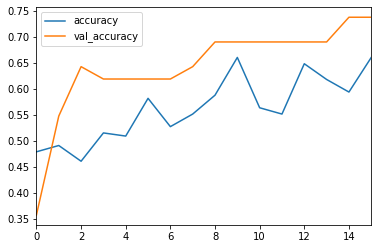

In [21]:
metrics[['accuracy', 'val_accuracy']].plot()

In [22]:
pred = model.predict_classes(X_test)

In [23]:
model.evaluate(X_test, y_test,verbose=0)

[0.6455626289049784, 0.7380952]

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.62      0.67      0.65        15

    accuracy                           0.74        42
   macro avg       0.72      0.72      0.72        42
weighted avg       0.74      0.74      0.74        42



In [26]:
print(confusion_matrix(y_test, pred))

[[21  6]
 [ 5 10]]
